### Final Project
### Author: Chris Cox
### Data: Plant Health
### Source: https://www.kaggle.com/datasets/ziya07/plant-health-data

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("plant_health_data.csv")

### Data Exploration
Okay so when doing a correlation of the data, I saw rows being correlaed with Plant_ID. We don't want that, because plant ID is a value that identifies the plant. It says nothing about its relationship to the other columns. So the question I'm trying to figure out here is what do I want to use for the index? Should I use Plant ID o should I use timestamp? What kinds of relationships can I find?

In [2]:
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [3]:
#This dataset looks pretty good so far, there are no null values, and the only column containing NaN is "plant_health_status"
df.isnull().sum(axis = 0)

Timestamp                 0
Plant_ID                  0
Soil_Moisture             0
Ambient_Temperature       0
Soil_Temperature          0
Humidity                  0
Light_Intensity           0
Soil_pH                   0
Nitrogen_Level            0
Phosphorus_Level          0
Potassium_Level           0
Chlorophyll_Content       0
Electrochemical_Signal    0
Plant_Health_Status       0
dtype: int64

In [4]:
df.dtypes

Timestamp                  object
Plant_ID                    int64
Soil_Moisture             float64
Ambient_Temperature       float64
Soil_Temperature          float64
Humidity                  float64
Light_Intensity           float64
Soil_pH                   float64
Nitrogen_Level            float64
Phosphorus_Level          float64
Potassium_Level           float64
Chlorophyll_Content       float64
Electrochemical_Signal    float64
Plant_Health_Status        object
dtype: object

In [5]:
df.describe()

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,5.500000,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764
std,2.873479,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116
min,1.000000,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376
25%,3.000000,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982
50%,5.500000,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647
75%,8.000000,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142
max,10.000000,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116


In [6]:
#10 values in Plant_ID. Plants are labelled 1 through 10. So there are 10 plants.
df["Plant_ID"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [7]:
#That looks like it should be pretty good. Let's look at timestamps and see if its worht keeping 
df.set_index("Plant_ID", inplace=True)
df

,Timestamp,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
Plant_ID,,,,,,,,,,,,,
1,2024-10-03 10:54:53.407995,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
1,2024-10-03 22:54:53.407995,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
1,2024-10-04 04:54:53.407995,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
1,2024-10-04 10:54:53.407995,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2024-11-01 04:54:53.493508,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
10,2024-11-01 10:54:53.493508,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
10,2024-11-01 16:54:53.493508,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress


In [8]:
#That's quite a lot of values using timestamps, although it could be useful later on, I want to know what the relationships are for now.

len(df["Timestamp"].unique())

1200

In [9]:
#The existence of the timestamp value counts 1200 values for each column. 
df.describe()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,25.106918,23.999130,19.957794,54.853165,612.637265,6.524102,30.106751,30.264484,30.112088,34.749591,0.987764
std,8.677725,3.441561,2.932073,8.784916,228.318853,0.581755,11.514396,11.466846,11.668085,8.766995,0.575116
min,10.000724,18.001993,15.003710,40.028758,200.615482,5.507392,10.003650,10.017690,10.000606,20.025511,0.002376
25%,17.131893,21.101766,17.353027,47.019694,416.878983,6.026042,20.249774,20.894445,19.585561,27.463350,0.487982
50%,25.168333,23.889044,19.911473,54.692069,617.240221,6.540524,30.138590,30.019385,30.495054,34.433427,0.981647
75%,32.370231,27.042634,22.596851,62.451053,811.474690,7.030039,40.184737,40.131459,40.108296,42.232637,1.473142
max,39.993164,29.990886,24.995929,69.968871,999.856262,7.497823,49.951136,49.980700,49.981945,49.990811,1.996116


In [10]:
df2 = df.drop(["Timestamp","Plant_Health_Status"], axis=1)

In [11]:
df2

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_ID,,,,,,,,,,,
1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402
1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899
1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728
1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088
1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805
...,...,...,...,...,...,...,...,...,...,...,...
10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553
10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029
10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019


<Axes: xlabel='Soil_Temperature', ylabel='Ambient_Temperature'>

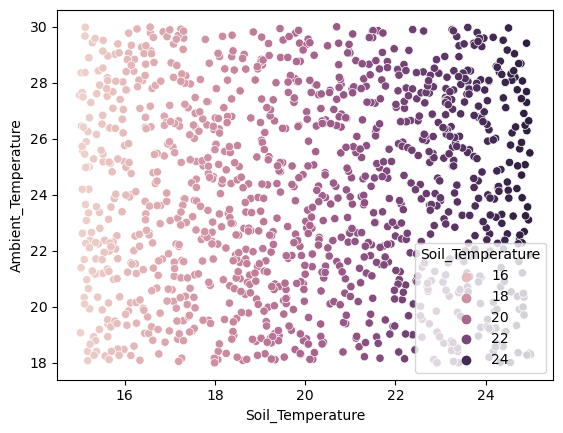

In [12]:
#There is still too much data here to make sense of a chosen relation, and there is no correlation.
sns.scatterplot(x="Soil_Temperature", y="Ambient_Temperature", hue="Soil_Temperature", data=df2.reset_index())

##
Now there's a problem. Without the Timestamp column we are unable to make sense of each row by just the plant ID. So I aggregated all the data by their mean values for each plant ID so that we can compare the characteristics like nutrients and temperature.

In [13]:
#Round the numbers to smaller digits for more readability, then aggregate by the average values, and group by plant.
#The dataframe now represents the average values for the characteristics of each plant. 
#This dataset now has only 10 rows of data to explore the relationships between the characteristics.
df2 = df2.groupby("Plant_ID").mean().round(1)
df2

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Plant_ID,,,,,,,,,,,
1,24.8,23.8,20.0,55.3,581.2,6.5,29.8,29.6,28.7,34.9,1.0
2,25.9,24.6,20.2,54.1,601.7,6.5,28.5,30.3,29.2,34.5,1.0
3,26.1,24.3,19.8,55.2,623.0,6.5,33.0,31.3,31.3,33.9,1.0
4,25.1,23.9,19.7,55.0,623.0,6.5,31.4,29.7,30.5,36.8,1.0
5,24.5,24.2,20.2,55.3,641.2,6.6,29.7,31.6,30.0,35.4,0.9
6,25.4,23.8,19.3,55.1,608.9,6.5,30.4,30.7,31.0,34.0,1.0
7,24.9,23.4,20.0,53.8,641.7,6.5,30.3,29.0,30.6,33.8,1.0
8,25.8,23.8,20.0,54.8,600.9,6.5,28.6,30.9,30.5,33.9,1.0
9,24.7,23.9,20.3,54.9,599.3,6.6,28.1,30.1,29.0,35.0,1.0


In [14]:
df2.describe()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
count,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,25.110000,23.990000,19.97000,54.860000,612.64000,6.530000,30.120000,30.270000,30.120000,34.750000,0.990000
std,0.691938,0.338132,0.30203,0.510338,19.33254,0.048305,1.526652,0.844656,0.875341,0.941925,0.031623
min,23.900000,23.400000,19.30000,53.800000,581.20000,6.500000,28.100000,29.000000,28.700000,33.800000,0.900000
25%,24.725000,23.800000,19.85000,54.825000,601.10000,6.500000,28.875000,29.625000,29.400000,33.925000,1.000000
50%,25.000000,23.900000,20.00000,55.050000,607.20000,6.500000,30.050000,30.200000,30.450000,34.700000,1.000000
75%,25.700000,24.200000,20.20000,55.175000,623.00000,6.575000,31.150000,30.850000,30.575000,35.225000,1.000000
max,26.100000,24.600000,20.30000,55.300000,641.70000,6.600000,33.000000,31.600000,31.300000,36.800000,1.000000


In [15]:
len(df2)

10

In [16]:
df2.dtypes

Soil_Moisture             float64
Ambient_Temperature       float64
Soil_Temperature          float64
Humidity                  float64
Light_Intensity           float64
Soil_pH                   float64
Nitrogen_Level            float64
Phosphorus_Level          float64
Potassium_Level           float64
Chlorophyll_Content       float64
Electrochemical_Signal    float64
dtype: object

In [17]:
df2.corr()

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal
Soil_Moisture,1.000000,0.209432,-0.386522,-0.228439,-0.061001,-0.741322,0.019775,0.432125,0.272971,-0.490131,0.309756
Ambient_Temperature,0.209432,1.000000,0.301370,0.177714,-0.117724,0.224490,0.073613,0.465677,-0.130639,0.162221,-0.218218
Soil_Temperature,-0.386522,0.301370,1.000000,-0.203282,-0.085022,0.601653,-0.461221,-0.117160,-0.611075,0.134744,-0.267569
Humidity,-0.228439,0.177714,-0.203282,1.000000,-0.239022,0.324522,0.322021,0.453147,0.044273,0.360586,-0.302937
Light_Intensity,-0.061001,-0.117724,-0.085022,-0.239022,1.000000,0.096137,0.371657,0.172437,0.568485,0.042285,-0.519071
Soil_pH,-0.741322,0.224490,0.601653,0.324522,0.096137,1.000000,-0.174778,0.106207,-0.252268,0.354096,-0.509175
Nitrogen_Level,0.019775,0.073613,-0.461221,0.322021,0.371657,-0.174778,1.000000,0.011719,0.686451,0.105858,0.096664
Phosphorus_Level,0.432125,0.465677,-0.117160,0.453147,0.172437,0.106207,0.011719,1.000000,0.262388,-0.196217,-0.553260
Potassium_Level,0.272971,-0.130639,-0.611075,0.044273,0.568485,-0.252268,0.686451,0.262388,1.000000,-0.249308,0.048168
Chlorophyll_Content,-0.490131,0.162221,0.134744,0.360586,0.042285,0.354096,0.105858,-0.196217,-0.249308,1.000000,-0.242468


<Axes: >

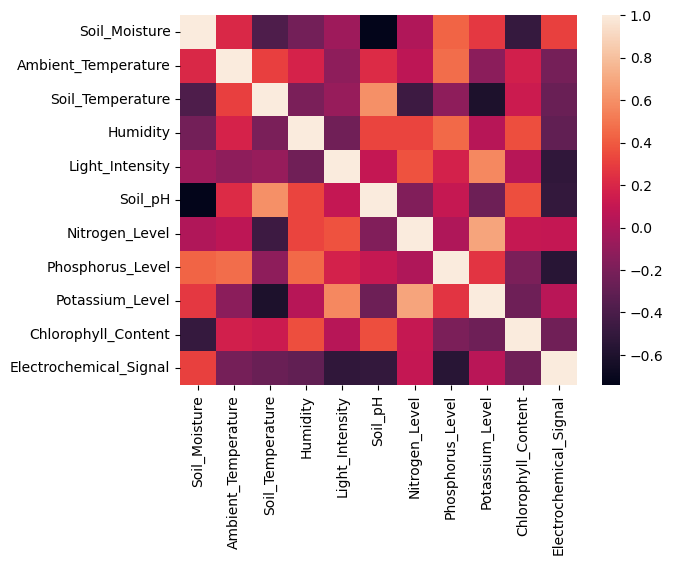

In [18]:
sns.heatmap(df2.corr())

I'm seeing that there are strong inverse correlations between things like soil temperature and potassium levels. This may be because we are trying to correlate temperature values with nutrients, so I decided to explore this data with nutrients and temperatures exclusively.

In [19]:
temp = df2[["Ambient_Temperature","Soil_Temperature","Humidity","Light_Intensity"]]
temp

,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity
Plant_ID,,,,
1,23.8,20.0,55.3,581.2
2,24.6,20.2,54.1,601.7
3,24.3,19.8,55.2,623.0
4,23.9,19.7,55.0,623.0
5,24.2,20.2,55.3,641.2
6,23.8,19.3,55.1,608.9
7,23.4,20.0,53.8,641.7
8,23.8,20.0,54.8,600.9
9,23.9,20.3,54.9,599.3


In [20]:
#That seems to be better. There are no strong inverse correlations now.
temp.corr()

,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity
Ambient_Temperature,1.000000,0.301370,0.177714,-0.117724
Soil_Temperature,0.301370,1.000000,-0.203282,-0.085022
Humidity,0.177714,-0.203282,1.000000,-0.239022
Light_Intensity,-0.117724,-0.085022,-0.239022,1.000000


<Axes: >

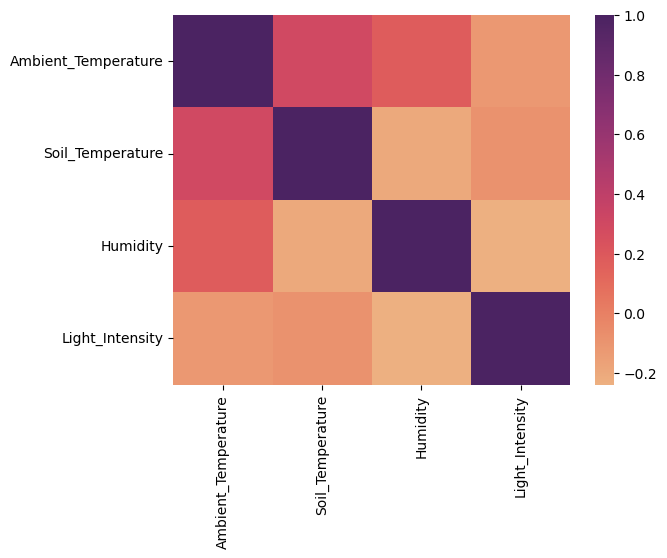

In [21]:
sns.heatmap(temp.corr(), cmap="flare")

In [22]:
df2.dtypes

Soil_Moisture             float64
Ambient_Temperature       float64
Soil_Temperature          float64
Humidity                  float64
Light_Intensity           float64
Soil_pH                   float64
Nitrogen_Level            float64
Phosphorus_Level          float64
Potassium_Level           float64
Chlorophyll_Content       float64
Electrochemical_Signal    float64
dtype: object

<Axes: >

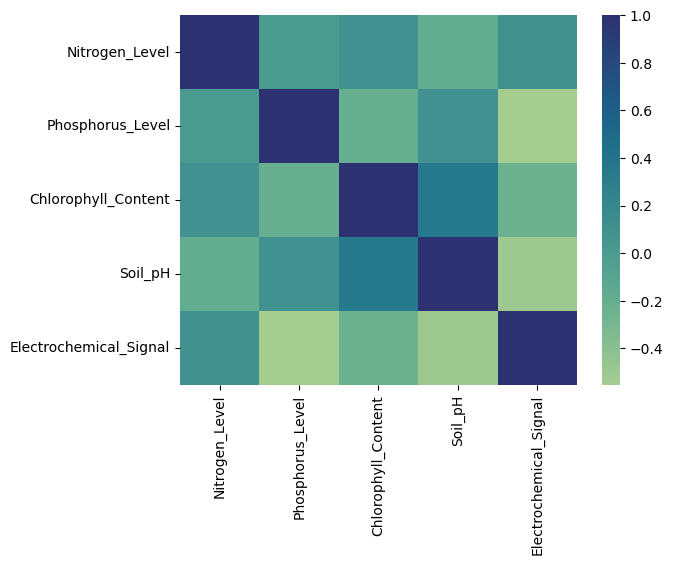

In [23]:
#What columns represent plant nutrients?
#Strong correlations between soil PH : Chlorophyll Content. They show a correlation of 0.6
nutrients = df2[["Nitrogen_Level","Phosphorus_Level","Chlorophyll_Content","Soil_pH","Electrochemical_Signal"]]
sns.heatmap(nutrients.corr(), cmap="crest")

In [24]:
nutrients

,Nitrogen_Level,Phosphorus_Level,Chlorophyll_Content,Soil_pH,Electrochemical_Signal
Plant_ID,,,,,
1,29.8,29.6,34.9,6.5,1.0
2,28.5,30.3,34.5,6.5,1.0
3,33.0,31.3,33.9,6.5,1.0
4,31.4,29.7,36.8,6.5,1.0
5,29.7,31.6,35.4,6.6,0.9
6,30.4,30.7,34.0,6.5,1.0
7,30.3,29.0,33.8,6.5,1.0
8,28.6,30.9,33.9,6.5,1.0
9,28.1,30.1,35.0,6.6,1.0


In [25]:
soil_content = nutrients.sample(frac=1)

<Axes: xlabel='Soil_pH', ylabel='Chlorophyll_Content'>

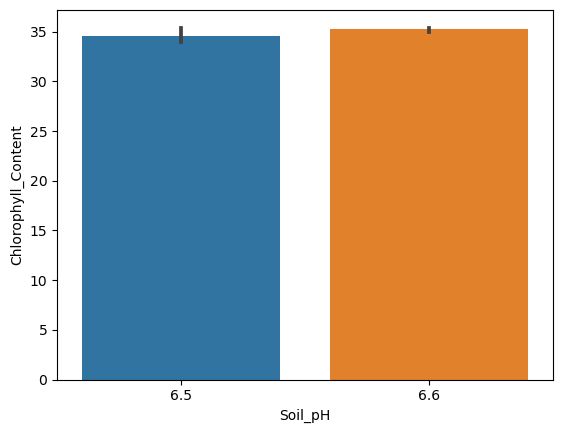

In [26]:
sns.barplot(data=nutrients, x="Soil_pH", y="Chlorophyll_Content")

# Data Classification
I see that there is a relationship worth exploring with the chlorophyll content given the nutrients and given soil content pH levels. Chlorophyll is not only what gives plants their color, it is what allows the plants to produce oxygen. Several medicines such as supplements and skin care products are made with chlorophyll. The chlorophyll is where the goodies are, so can we predict how the nutrients will determine a plants given chlorophyll levels?

In [27]:
#Graph with timeseries using Timestamp as index, or create model with Plant Stress. 
df

,Timestamp,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
Plant_ID,,,,,,,,,,,,,
1,2024-10-03 10:54:53.407995,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
1,2024-10-03 22:54:53.407995,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
1,2024-10-04 04:54:53.407995,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
1,2024-10-04 10:54:53.407995,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2024-11-01 04:54:53.493508,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
10,2024-11-01 10:54:53.493508,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
10,2024-11-01 16:54:53.493508,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress


In [28]:
pd.crosstab(df["Plant_Health_Status"], df["Chlorophyll_Content"].mean())

col_0,34.749591
Plant_Health_Status,
Healthy,299
High Stress,500
Moderate Stress,401


In [29]:
#create a new dataframe with selected columns
classif = df[["Plant_Health_Status","Soil_pH","Chlorophyll_Content", "Nitrogen_Level","Phosphorus_Level"]]
classif

,Plant_Health_Status,Soil_pH,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level
Plant_ID,,,,,
1,High Stress,5.581955,35.703006,10.003650,45.806852
1,High Stress,7.135705,27.993296,30.712562,25.394393
1,High Stress,5.656852,43.646308,29.337002,27.573892
1,High Stress,5.584523,37.838095,16.966621,26.180705
1,High Stress,5.919707,48.265812,10.944961,37.898907
...,...,...,...,...,...
10,Moderate Stress,5.715289,24.273224,29.993107,14.914470
10,High Stress,5.958957,30.930676,45.258678,25.216248
10,Moderate Stress,7.419157,38.324484,38.351189,48.656078


In [30]:
classif.drop_duplicates()

,Plant_Health_Status,Soil_pH,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level
Plant_ID,,,,,
1,High Stress,5.581955,35.703006,10.003650,45.806852
1,High Stress,7.135705,27.993296,30.712562,25.394393
1,High Stress,5.656852,43.646308,29.337002,27.573892
1,High Stress,5.584523,37.838095,16.966621,26.180705
1,High Stress,5.919707,48.265812,10.944961,37.898907
...,...,...,...,...,...
10,Moderate Stress,5.715289,24.273224,29.993107,14.914470
10,High Stress,5.958957,30.930676,45.258678,25.216248
10,Moderate Stress,7.419157,38.324484,38.351189,48.656078


In [31]:
classif.dropna()

,Plant_Health_Status,Soil_pH,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level
Plant_ID,,,,,
1,High Stress,5.581955,35.703006,10.003650,45.806852
1,High Stress,7.135705,27.993296,30.712562,25.394393
1,High Stress,5.656852,43.646308,29.337002,27.573892
1,High Stress,5.584523,37.838095,16.966621,26.180705
1,High Stress,5.919707,48.265812,10.944961,37.898907
...,...,...,...,...,...
10,Moderate Stress,5.715289,24.273224,29.993107,14.914470
10,High Stress,5.958957,30.930676,45.258678,25.216248
10,Moderate Stress,7.419157,38.324484,38.351189,48.656078


# #
I performed some data cleaning to drop all duplicates and NaN values. Next I want to take a random sample to predict how Light Intensity affects Plant Health. 

In [52]:
#Randomize the sample for the model
classif_sample = classif.sample(frac=1, random_state=1).head(100)
classif_sample

,Plant_Health_Status,Soil_pH,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level
Plant_ID,,,,,
6,Healthy,5.774395,37.151796,31.837599,23.820522
6,High Stress,6.489063,24.320848,28.373269,33.477436
9,High Stress,7.154053,34.048956,34.472852,48.007424
2,High Stress,7.370079,22.072674,49.452891,28.225647
10,High Stress,5.877195,42.401870,13.707559,15.563022
...,...,...,...,...,...
10,High Stress,7.056360,29.638479,17.311908,37.043276
1,High Stress,6.206010,26.776076,49.146310,44.083186
7,Moderate Stress,5.786802,29.890916,28.037375,29.129718


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
classif_sample.dtypes

Plant_Health_Status     object
Soil_pH                float64
Chlorophyll_Content    float64
Nitrogen_Level         float64
Phosphorus_Level       float64
dtype: object

I want to see how the Chlorophyll Content changes because of changes in the soil content. My hope is that this is a model that will work to determine if a plant will be healthy since I saw that soil_pH and CC had a correlation of 0.6 when I compared their averages

In [50]:
#train, test = train_test_split(classif_sample, test_size=0.25)

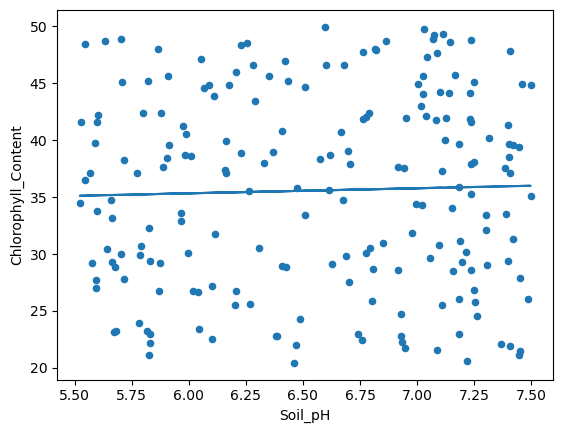

In [51]:
x = classif_sample[["Soil_pH"]]
y = classif_sample[["Chlorophyll_Content"]]
r = LinearRegression().fit(x, y)
predictions = r.predict(x)

ax = classif_sample.plot(kind="scatter", y='Chlorophyll_Content', x='Soil_pH')
ax.plot(classif_sample.Soil_pH, predictions)

This is not at all a good model.

## Timeseries

My goal here is to look at timeseries with the two dataframes I created earlier. One for Nutrients, and another for Temperature.

In [53]:
#Timestamp is an object by default, so I will make it into a datetime object
df.dtypes

Timestamp                  object
Soil_Moisture             float64
Ambient_Temperature       float64
Soil_Temperature          float64
Humidity                  float64
Light_Intensity           float64
Soil_pH                   float64
Nitrogen_Level            float64
Phosphorus_Level          float64
Potassium_Level           float64
Chlorophyll_Content       float64
Electrochemical_Signal    float64
Plant_Health_Status        object
dtype: object

In [54]:
df["Timestamp"] = pd.to_datetime(df.Timestamp)

In [55]:
df.dtypes

Timestamp                 datetime64[ns]
Soil_Moisture                    float64
Ambient_Temperature              float64
Soil_Temperature                 float64
Humidity                         float64
Light_Intensity                  float64
Soil_pH                          float64
Nitrogen_Level                   float64
Phosphorus_Level                 float64
Potassium_Level                  float64
Chlorophyll_Content              float64
Electrochemical_Signal           float64
Plant_Health_Status               object
dtype: object

In [56]:
#The scope of the timestamp is about one month. The final value is 2024-11-02. 
df.Timestamp

Plant_ID
1    2024-10-03 10:54:53.407995
1    2024-10-03 16:54:53.407995
1    2024-10-03 22:54:53.407995
1    2024-10-04 04:54:53.407995
1    2024-10-04 10:54:53.407995
                ...            
10   2024-11-01 04:54:53.493508
10   2024-11-01 10:54:53.493508
10   2024-11-01 16:54:53.493508
10   2024-11-01 22:54:53.493508
10   2024-11-02 04:54:53.493508
Name: Timestamp, Length: 1200, dtype: datetime64[ns]

In [57]:
df.dtypes

Timestamp                 datetime64[ns]
Soil_Moisture                    float64
Ambient_Temperature              float64
Soil_Temperature                 float64
Humidity                         float64
Light_Intensity                  float64
Soil_pH                          float64
Nitrogen_Level                   float64
Phosphorus_Level                 float64
Potassium_Level                  float64
Chlorophyll_Content              float64
Electrochemical_Signal           float64
Plant_Health_Status               object
dtype: object

In [58]:
#I want to get ride of the timestamp so that we are just left with dates. My time series will look at month and yearly periods.
#df["Timestamp"] = df.Timestamp.dt.strftime('%Y-%m-%d')

In [59]:
#df["Timestamp"] = pd.to_datetime(df.Timestamp, format='%Y-%M-%D')

In [60]:
df.set_index("Timestamp", inplace=True)

In [61]:
#Timestamp is now the index
df

,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
Timestamp,,,,,,,,,,,,
2024-10-03 10:54:53.407995,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
2024-10-03 16:54:53.407995,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2024-10-03 22:54:53.407995,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
2024-10-04 04:54:53.407995,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
2024-10-04 10:54:53.407995,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 04:54:53.493508,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
2024-11-01 10:54:53.493508,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
2024-11-01 16:54:53.493508,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress


In [62]:
nutrientsTime = df[["Nitrogen_Level","Phosphorus_Level","Soil_pH"]]
tempTime = df[["Ambient_Temperature","Soil_Temperature","Humidity","Light_Intensity"]]


In [63]:
import matplotlib.pyplot as pyplt

In [64]:
ts1 = nutrientsTime.asfreq('W')

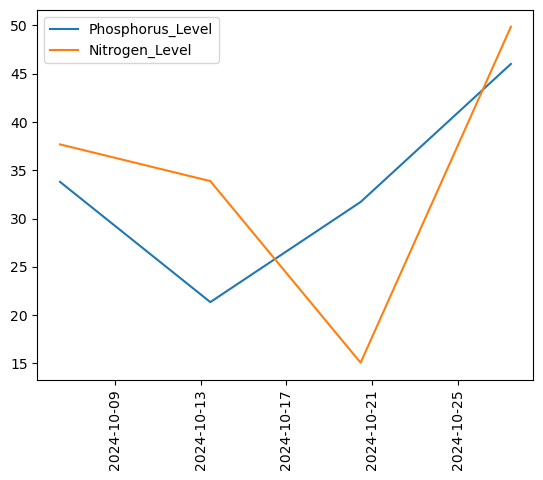

In [65]:
#Use pyplot to graph the changes in Phosphorous and Nitrogen over 30 days
pyplt.plot("Timestamp","Phosphorus_Level", data=ts1.reset_index())
pyplt.plot("Timestamp","Nitrogen_Level", data=ts1.reset_index())
pyplt.legend()
pyplt.tick_params(axis="x", labelrotation=90)

In [66]:
nutrientsTime.reset_index().groupby(["Soil_pH", pd.Grouper(key="Timestamp", freq="D", origin="2024-10-03")]).mean()

,,Nitrogen_Level,Phosphorus_Level
Soil_pH,Timestamp,,
5.507392,2024-10-18,12.098321,25.848136
5.508954,2024-10-15,33.598529,41.198485
5.513870,2024-10-09,33.146253,36.047424
5.517241,2024-10-16,29.346726,24.540740
5.517642,2024-10-24,35.652470,40.115724
...,...,...,...
7.493486,2024-10-13,12.574718,49.509536
7.495422,2024-10-18,48.756367,22.342778
7.497374,2024-11-02,31.052470,30.663181


In [67]:
ts2 = tempTime.asfreq('W')
ts2

,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity
Timestamp,,,,
2024-10-06 10:54:53.407995,19.000492,22.384287,57.754135,436.374679
2024-10-13 10:54:53.407995,18.087699,18.616696,44.808250,547.135862
2024-10-20 10:54:53.407995,23.930976,21.243318,69.893152,392.787246
2024-10-27 10:54:53.407995,25.756048,15.998343,48.072520,425.326805


Soil and Ambient temp are both measured by degrees F. Lets drop Humidity and Light Intensity because they are measured differently.
Light is measured by lumens, and humidity measured by water vapor. These will not be ideal for finding a relationship.

In [68]:
ts2.drop(["Humidity","Light_Intensity"], axis=1)

,Ambient_Temperature,Soil_Temperature
Timestamp,,
2024-10-06 10:54:53.407995,19.000492,22.384287
2024-10-13 10:54:53.407995,18.087699,18.616696
2024-10-20 10:54:53.407995,23.930976,21.243318
2024-10-27 10:54:53.407995,25.756048,15.998343


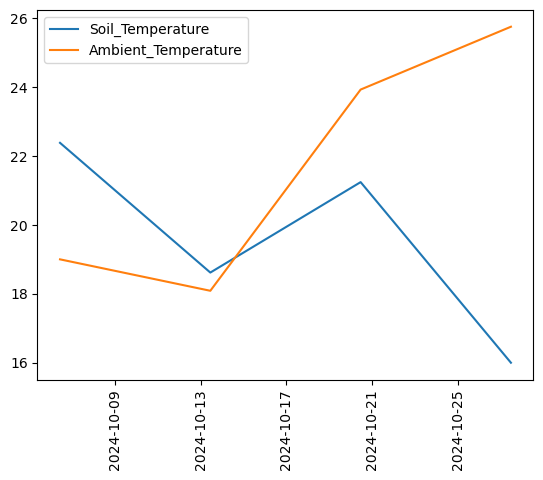

In [69]:
pyplt.plot("Timestamp","Soil_Temperature", data=ts2.reset_index())
pyplt.plot("Timestamp","Ambient_Temperature", data=ts2.reset_index())
pyplt.legend()
pyplt.tick_params(axis="x", labelrotation=90)

Neither of these timeseries graphs seem to be great at finding relationships because the dataset is rather small. However, it does seem that ambient temp and soil temp have an inverse relationship that after one goes down, the other goes up over the course of 8 weeks.

Lets go back to the beginning now to see what chlorophyll content and nutrients look like and soil_pH

In [70]:
df3 = df[["Chlorophyll_Content","Nitrogen_Level","Phosphorus_Level","Soil_pH","Potassium_Level"]]

In [71]:
df3

,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level,Soil_pH,Potassium_Level
Timestamp,,,,,
2024-10-03 10:54:53.407995,35.703006,10.003650,45.806852,5.581955,39.076199
2024-10-03 16:54:53.407995,27.993296,30.712562,25.394393,7.135705,17.944826
2024-10-03 22:54:53.407995,43.646308,29.337002,27.573892,5.656852,35.706530
2024-10-04 04:54:53.407995,37.838095,16.966621,26.180705,5.584523,26.257746
2024-10-04 10:54:53.407995,48.265812,10.944961,37.898907,5.919707,37.654483
...,...,...,...,...,...
2024-11-01 04:54:53.493508,24.273224,29.993107,14.914470,5.715289,21.560747
2024-11-01 10:54:53.493508,30.930676,45.258678,25.216248,5.958957,31.940717
2024-11-01 16:54:53.493508,38.324484,38.351189,48.656078,7.419157,28.473233


Can we find an EMA with CC?

In [72]:
ts3 = df3.asfreq('W')
ts3

,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level,Soil_pH,Potassium_Level
Timestamp,,,,,
2024-10-06 10:54:53.407995,44.580312,37.681273,33.798220,7.323473,13.927254
2024-10-13 10:54:53.407995,36.120029,33.877471,21.340979,5.945849,32.214140
2024-10-20 10:54:53.407995,25.531425,15.060011,31.716069,6.729857,34.738449
2024-10-27 10:54:53.407995,25.096866,49.871454,46.017697,7.049627,21.653003


soil_pH is measured by acidity in pH. It is not the same unit of measurement as Nitrogen and Phosphorus, it is not suitable for graphing.

In [73]:
ts3.drop(["Soil_pH"], axis=1)

,Chlorophyll_Content,Nitrogen_Level,Phosphorus_Level,Potassium_Level
Timestamp,,,,
2024-10-06 10:54:53.407995,44.580312,37.681273,33.798220,13.927254
2024-10-13 10:54:53.407995,36.120029,33.877471,21.340979,32.214140
2024-10-20 10:54:53.407995,25.531425,15.060011,31.716069,34.738449
2024-10-27 10:54:53.407995,25.096866,49.871454,46.017697,21.653003


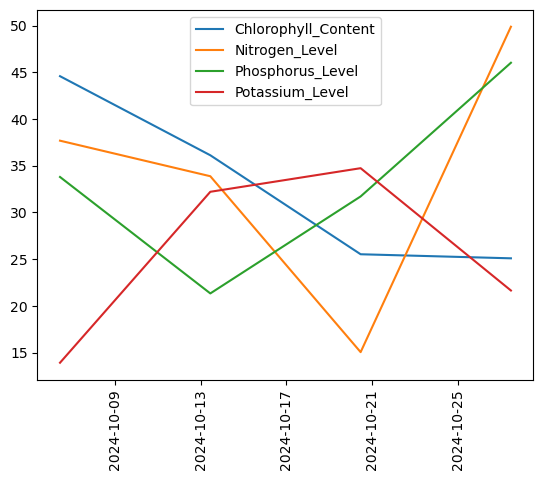

In [74]:
pyplt.plot("Timestamp","Chlorophyll_Content", data=ts3.reset_index())
pyplt.plot("Timestamp","Nitrogen_Level", data=ts3.reset_index())
pyplt.plot("Timestamp","Phosphorus_Level", data=ts3.reset_index())
pyplt.plot("Timestamp","Potassium_Level", data=ts3.reset_index())
pyplt.legend()
pyplt.tick_params(axis="x", labelrotation=90)

The cc actually decreased over the 8 weeks this data represents while other nutrients increased.

Also not a good graph comparing all 4, there are no relatioships between any of them.